# Projeto de Aprendizado de Máquina

**Grupo `roboroubourobo`**

| Nome                          | RA          |
|:------------------------------|------------:|
| Bruno Sanches Rodrigues       | 11201721076 |
| Enzo Shiraishi Nunes da Silva | 11201822545 |
| Guilherme de Sousa Santos     | 11201921175 |
| Thales Henrique Nogueira      | 11201811829 |


Esta é a atividade final da disciplina de Aprendizado de Máquina do Q1 de 2022. É uma atividade em grupo, onde vocês avaliarão diferentes arquiteturas de redes neurais para um conjunto de dados médicos (octmnist).


***Nesta atividade vocês deverão obrigatoriamente entregar 2 arquivos:***

***(i) um arquivo .pdf com um relatório dos resultados alcançado. Este será o principal item a ser pontuado e deve ser feito com cuidado;***

***(ii) um arquivo .ipynb com o código que vocês utilizaram para gerar os resultados do relatório. Será utilizado para avaliar como os dados do relatório foram gerados.***

---

O relatório deverá ter 3 seções, descritas abaixo:

---

## Teste com arquitetura profunda de redes neurais

Aqui vocês irão comparar 2 arquiteturas de redes neurais. A primeira com 2 camadas escondidas com 200 neurônios em cada e a segunda com 10 camadas escondidades com 50 neurônios em cada. Treine as redes por 50 épocas, usando o algoritmo SGD com momento e correção de Nesterov.

a) Compare o desempenho delas, verificando as curvas do erro (loss) e acurácia (accuracy) por 50 passos. Discuta o resultados, olhando para as velocidades de convergência e explique por que a arquitetura mais profunda teve um desempenho melhor. 

Em seguida, verifique a acurácia da validação depois de 50 épocas e a acurácia sobre os dados de teste. Explique por que a acurácia nos dados de teste ficou tão mais baixa que as dos dados de validação.

b) Corrija o problema do balanceamento usando diferentes pesos para cada classe, dependendo da quantidade de exemplos em cada uma delas. Repita o procedimento realizado no item b) e faça as mesmas discussões. Em todas as seções seguintes faremos o treinamento usando os pesos das classes.

c) Use a rede neural para fazer predições para os dados do conjunto de teste, usando a função `predict`. Para cada uma das classes 0, 1, 2, e 3, calcule qual a precisão, cobertura e f1-score. Gere também a matriz de confusão e discuta as predições obtidas.

---


## Busca de parâmetros de Redes Neurais


Aqui compararemos diferentes tipos de otimização nas redes neurais. 

a) Primeiro compararemos o uso de regularização Dropout. Teste o uso de camadas de dropout após cada camada da rede neural e encontre valores onde vocês conseguem reduzir o erro no conjunto de teste. Aqui, aumente o número de épocas para 100, pois com Dropout a convergência demora mais.

Coloque no relatório alguns exemplos de valores de dropout_rate que você utilizou. Selecione então o valor que gerou o melhor resultado, que é o que você passará a utilizar. Em seguida, explique porque a acurácia para os dados treinamento é menor que para os dados de validação e teste.

Compare também as curvas de erro (loss) e de acurácia utilizando dropout com o caso sem dropout e explique as diferenças encontradas.

b) Avalie alguns outros parâmetros de otimização vistos em aula, como otimizadores, escalonamento de taxas de aprendizado, e outros. Discuta o motivo da escolha dos parâmetros e dos valores utilizados e os resultados obtidos. Selecione qual o melhor conjunto de parâmetros encontrado. Esta é uma parte do trabalho mais livre, onde vocês tem liberdade de tomar o caminho que acharem mais apropriado.

Dica: como a atividade é em grupo, vocês podem dividir entre vocês os hiperparâmetros que irão testar. Assim o processo de avaliação é mais rápido e vocês não esgotam o tempo de GPU que possuem no Colab.

---


## Comparação com outras arquiteturas de AM

Agora vocês irão comparar o desempenho das Redes Neurais com outros algoritmos de AM. 

a) Utilize um modelo de Boosting, como o XGBoost, com os dados do octmnist. Você deve fazer uma análise cuidadosa do uso deste método, incluindo a busca de parâmetros com validação cruzada. Coloque no relatório todos os parâmetros que você testou e os resultados obtidos. 

Escolha o melhor modelo encontrado e compare o desempenho com o modelo de redes neurais. A partir das diferenças de acurácia e tempo de execução, qual sua conclusão sobre o uso de redes neurais e algoritmos de árvores neste problema.


## Conjunto de Dados

Nesta atividade vocês irão utilizar um conjunto de dados médicos denominado MedMNIST, que foi desenvolvido para servir como base dados para métodos leves de aprendizado de máquina e visão computacional.

Na página do projeto (https://medmnist.com/) vocês podem encontrar mais informações sobre os conjuntos de dados lá presentes, um artigo descrevendo os dados e outras informações. Eles disponibilizam um pacote python para uso dos dados, mas o foco dele é o pytorch, que não estamos utilizando nesta disciplina.

Usaremos o conjunto de dados octmnist. Este conjunto contém dados de optical coherence tomography (OCT) para identificação de doenças da retina. Ele possui 4 categorias de diagnósticos.

Você pode baixar os dados diretamente do repositório, clicando em:
https://zenodo.org/record/5208230/files/octmnist.npz?download=1

Estes dados estão no formato npz, que é um formato de armazenamento do numpy. Ele pode ser carregado utilizando o comando `np.load`. As células de código irão auxiliá-los a carregar o arquivo no Colab e dividi-los nas classes de treino, validação e teste.

In [ ]:
from warnings import filterwarnings
import os  

filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
# Bibliotecas utilizadas

# manipulacao de dados
import numpy as np
import pandas as pd

# visualizacao
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib import rcParams

# preprocessamento
from sklearn.preprocessing import OneHotEncoder

# criacao de modelos
import tensorflow as tf
from xgboost import XGBClassifier

# avaliacao dos modelos
from sklearn.utils import class_weight
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    plot_confusion_matrix,
    classification_report
)

# utilidades
import joblib
from sys import modules
from datetime import datetime, timedelta
from IPython.display import display, Markdown, clear_output
from time import time

# Configurações

# Constantes
CLASSES = [0, 1, 2, 3]
INPUT_SHAPE = [28, 28]
METRICS = ["accuracy"]
MOMENTUM = 0.9

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
# teoricamente esse comando funciona pelo tensorflow, numpy e python
tf.keras.utils.set_random_seed(RANDOM_STATE)
SKF = StratifiedKFold(shuffle=True, n_splits=3, random_state=RANDOM_STATE)

COLOR = ["crimson","orange","mediumseagreen", "dodgerblue"]

create_params = {}
fit_params = {}

# Gráficos
%matplotlib inline

rcParams.update({
    'figure.figsize': (5, 5),
    'figure.autolayout': True,
    'figure.constrained_layout.use': True,
    'axes.titleweight': "bold",
    'xtick.top': False,
    'ytick.right': False,
    'xtick.bottom': False,
    'ytick.left': False,
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.edgecolor': 'silver',
    "legend.loc": "lower center",
    "patch.linewidth": 0,
    'image.cmap': "Set2",
    'axes.facecolor': "white",
    'savefig.facecolor': "white",
})

# Função usada para definir o texto dos gráficos
def set_plot_text(
    xlabel='', ylabel='', title='', axis=None, xticks=None, yticks=None, has_legend=False, x_percentage=False, y_percentage=False
):
    if axis is None:
        axis = plt.gca()

    axis.set_title(title)
    axis.set_xlabel(xlabel)    
    axis.set_ylabel(ylabel)
    
    if xticks is not None:
        axis.set_xticks(xticks)

    if yticks is not None:
        axis.set_yticks(yticks)

    if has_legend:
        legend = axis.legend(bbox_to_anchor=(0.5, -0.5))
        legend_frame = legend.get_frame()
        legend_frame.set_linewidth(0.0)

    if x_percentage:
        axis.set_xlim(0, 1)
        axis.xaxis.set_major_formatter(PercentFormatter(1, 0)) 
    
    if y_percentage:
        axis.set_ylim(0, 1)
        axis.yaxis.set_major_formatter(PercentFormatter(1, 0))

In [ ]:
# Ao longo do trabalho as funções abaixo são usadas para melhorar a legibilidade e manutenção:
#   load_data: Lê os dados do disco independentemente do ambiente e mostra gráficos que descrevem os dados lidos.
#   create_model: Função parametrizada que cria Redes Neurais com diferentes camadas, neurônios e otimizações de forma parametrizada.
#   fit_model: Função parametrizada que cria Redes Neurais com diferentes configurações e otimizações de forma parametrizada e serializa o modelo para o disco usando a biblioteca joblib para uso posterior.
#   display_metrics_by_class: Mostra a visualização das métricas para todas as classes de um modelo.

In [ ]:
def create_model(
    n_layers,
    n_neurons,
    dropout_rate=None,
    kernel_initializer="glorot_uniform",
    batch_normalization=False,
):
    model = tf.keras.models.Sequential(
        [tf.keras.layers.Flatten(input_shape=INPUT_SHAPE)]
    )

    activation = "elu" if kernel_initializer == "he_normal" else "relu"
    for _ in range(n_layers):
        if batch_normalization:
            tf.keras.layers.BatchNormalization()

        model.add(
            tf.keras.layers.Dense(
                n_neurons, activation=activation, kernel_initializer=kernel_initializer
            )
        )

        if dropout_rate is not None:
            model.add(tf.keras.layers.Dropout(rate=dropout_rate))

    model.add(tf.keras.layers.Dense(len(CLASSES), activation="softmax"))

    return model


In [ ]:
def get_class_weights(y_train):
    y_train_flat = y_train.reshape(y_train.shape[0])
    weights = class_weight.compute_class_weight(
        "balanced", classes=CLASSES, y=y_train_flat
    )
    return dict(enumerate(weights))


In [ ]:
def fit_model(
    model,
    X_train,
    y_train,
    X_vali,
    y_vali,
    X_test,
    y_test,
    n_epochs,
    weighted=False,
    adam=False,
    early_stopping=False,
    exponential_decay=False,
    dump=False
):
    if adam:
        optimizer = "adam"
    else:
        if exponential_decay:
            initial_learning_rate = 0.1
            decay_steps = 1000
            decay_rate = 0.96

            learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate,
                decay_steps=decay_steps,
                decay_rate=decay_rate,
                staircase=True
            )
        
        else:
            learning_rate = 0.005
        
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=MOMENTUM, nesterov=True)

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=METRICS)

    callbacks = []

    if early_stopping:
        callbacks.append(tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5))
    
    weights = get_class_weights(y_train) if weighted else None

    start_time = time()
    
    history = model.fit(
        X_train,
        y_train,
        epochs=n_epochs,
        validation_data=(X_vali, y_vali),
        class_weight=weights,
        verbose=0,
        callbacks=callbacks
    )

    end_time = time()
    
    duration = end_time - start_time
    timestamp = timedelta(seconds=np.floor(duration))
    
    score = model.evaluate(X_test, y_test, verbose=0)
    
    print(
        f'Duração: {timestamp}'
        f'\nCusto (teste): {score[0]:.2f}'
        f'\nAcurácia (teste): {score[1]:.2%}'
    )

    df = pd.DataFrame(history.history)
    df_accuracy = df[['accuracy', 'val_accuracy']]
    df_loss = df[['loss', 'val_loss']]

    figure = plt.figure(figsize=(10, 5))
    accuracy_axis, loss_axis = figure.subplots(1, 2)

    df_accuracy.plot(ax=accuracy_axis)
    set_plot_text('Época', 'Valor', 'Acurácia', accuracy_axis, has_legend=True, y_percentage=True)

    df_loss.plot(ax=loss_axis)
    set_plot_text('Época', 'Valor', 'Custo', loss_axis, has_legend=True)

    if dump:
        today = datetime.today()
        joblib.dump(model, f'model_{today.strftime("%d_%m_%Hh%M")}.joblib')

In [ ]:
def load_data():    
    if "google.colab" in modules:
        from google.colab import files

        files.upload()

    dados_npz = np.load("octmnist.npz")

    X_train = dados_npz["train_images"]
    y_train = dados_npz["train_labels"]
    
    X_vali = dados_npz["val_images"]
    y_vali = dados_npz["val_labels"]
    
    X_test = dados_npz["test_images"]
    y_test = dados_npz["test_labels"]

    X_train = X_train / 255.0
    X_vali = X_vali / 255.0
    X_test = X_test / 255.0

    # Formato dos conjuntos de dados
    for key, value in list(dados_npz.items())[:3]:
        print(
            f'{key}: {value.shape[0]} imagens ({value.shape[1]} x {value.shape[2]})'
        )
    print()
    for key, value in list(dados_npz.items())[3:]:
        print(f'{key}: {value.shape[0]} linhas')

    # Visualização de algumas imagens
    figure = plt.figure(figsize=(20, 5))
    axes = figure.subplots(1, 4)
    for image, image_class, axis in zip(X_train[:4], y_train[:4], axes.flat):
        axis.imshow(image, cmap="gray")
        axis.set_title(f'Classe: {image_class}')

    # Distribuição das classes
    figure = plt.figure(figsize=(15, 5))
    axes = figure.subplots(1, 3)
    for i, axis, title in zip(
        [y_train, y_vali, y_test], axes, ["Treino", "Validação", "Teste"]
    ):
        counts = np.unique(i, return_counts=True)
        axis.barh(*counts, color=COLOR)
        set_plot_text("Classe", "Contagem", title, axis, yticks=CLASSES)
        axis.set_xlim(0, np.sum(counts[1]))
    return X_train, y_train, X_vali, y_vali, X_test, y_test


In [ ]:
def display_metrics_by_class(model, X_test, y_test):
    if isinstance(model, tf.keras.models.Sequential):
        y_pred = np.argmax(model.predict(X_test), axis=1)
    else:
        y_pred = model.predict(X_test)
    
    report = classification_report(y_pred, y_test, output_dict=True, target_names=CLASSES)

    print(f'Acurácia (teste): {report["accuracy"]:.2%}\n')

    df = pd.DataFrame([report[i] for i in range(0,4)]).drop('support', axis=1)
    display(Markdown(df.applymap(lambda item: f'{item:.2%}').to_markdown()))

    figure = plt.figure(figsize=(15, 5))
    axes = figure.subplots(1, 3)
    
    for column, axis in zip(df, axes):
        axis.bar(CLASSES, df[column], color=COLOR)
        set_plot_text(xlabel="Classe", title=column, axis=axis, xticks=CLASSES, y_percentage=True)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
    disp.plot(cmap="gray_r", colorbar=False)
    set_plot_text(title="Matriz de Confusão")

    axis = plt.gca()
    axis.grid(False)
    set_plot_text()

Saving octmnist.npz to octmnist.npz
train_images: 97477 imagens (28 x 28)
val_images: 10832 imagens (28 x 28)
test_images: 1000 imagens (28 x 28)

train_labels: 97477 linhas
val_labels: 10832 linhas
test_labels: 1000 linhas


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  func(*args, **kwargs)


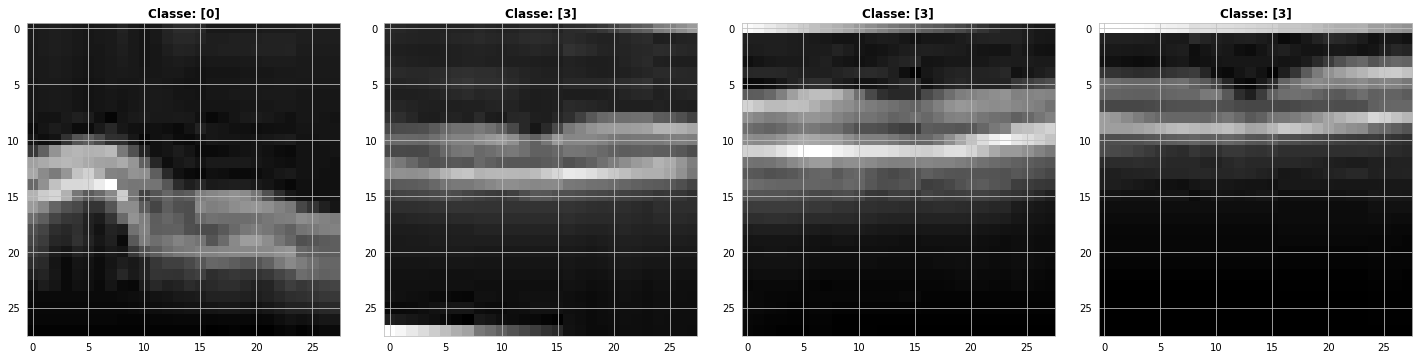

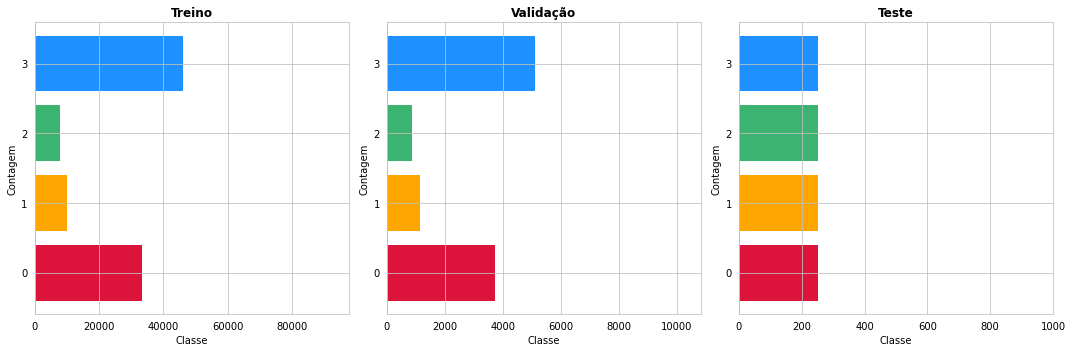

In [ ]:
X_train, y_train, X_vali, y_vali, X_test, y_test = load_data()

X_train_flat = X_train.reshape(X_train.shape[0], np.prod(INPUT_SHAPE))
X_test_flat = X_test.reshape(X_test.shape[0], np.prod(INPUT_SHAPE))
y_train_flat = y_train.reshape(y_train.shape[0])
y_test_flat = y_test.reshape(y_test.shape[0])

datasets = {
    'X_train': X_train,
    'y_train': y_train,
    'X_vali': X_vali,
    'y_vali': y_vali,
    'X_test': X_test,
    'y_test': y_test
}


## Teste com arquitetura profunda de redes neurais

> Aqui vocês irão comparar 2 arquiteturas de redes neurais. A primeira com 2 camadas escondidas com 200 neurônios em cada e a segunda com 10 camadas escondidades com 50 neurônios em cada. Treine as redes por 50 épocas, usando o algoritmo SGD com momento e correção de Nesterov.

Nesta seção vocês colocacarão o código utilizado na seção 1 do relatório. 

Dica: para usar os dados de validação durante o treinamento, você pode utilizar o comando abaixo:
```
history2 = model.fit(X_train, y_train, epochs=50, validation_data=(X_vali, y_vali))
```
Netes caso, ao invés de separar uma parte dos dados de treino para validação, como feito em aula, a função `fit` recebe explicitamente quais os dados que serão utilizados como validação com o parâmetro `validation_data`.

**Balanceamento de pesos:**

Quando o conjunto de treino é muito desbalanceado, o algoritmo de aprendizado de máquina irá tender a selecionar a categoria que aparece mais vezes com mais frequência. 

Em um caso extremo, imagine um exemplo onde a categoria A aparece em 90% dos exemplos e a categoria B 10%. Um algoritmo de AM que sempre responda categoria A, independemente da entrada, terá uma acurácia de 90%!

Uma maneira de resolver este problema é atribuindo um peso maior ao erro no caso de classes pouco representadas. A função `class_weight.compute_class_weight` faz este processo.
```
from sklearn.utils import class_weight
y_trainA = y_train.reshape(y_train.shape[0])
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_trainA), y=y_trainA)
weights = dict(enumerate(weights))
```

Você pode então passar este vetor como parâmetro para a função fit: `class_weight=weights`


In [ ]:
fit_params['n_epochs'] = 50

### Modelo 1

Duração: 0:06:22
Custo (teste): 1.25
Acurácia (teste): 62.40%


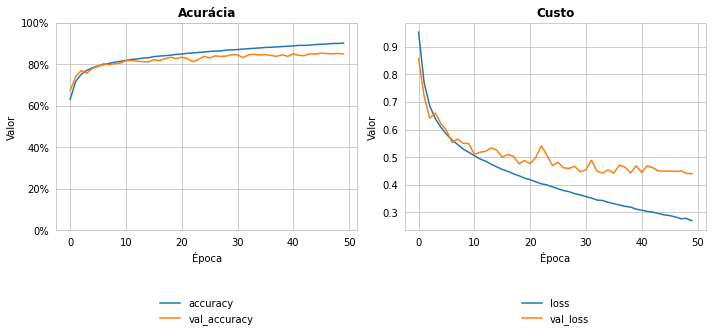

In [ ]:
model_1 = create_model(2, 200)
fit_model(model_1, **datasets, **fit_params)

### Modelo 2

Duração: 0:07:58
Custo (teste): 1.15
Acurácia (teste): 57.80%


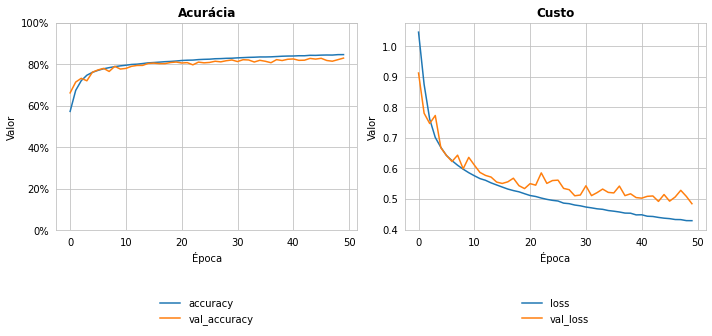

In [ ]:
model_2 = create_model(10, 50)
fit_model(model_2, **datasets, **fit_params)

### Item A

> Compare o desempenho delas, verificando as curvas do erro (loss) e acurácia (accuracy) por 50 passos. Discuta o resultados, olhando para as velocidades de convergência e explique por que a arquitetura mais profunda teve um desempenho melhor.
>
> Em seguida, verifique a acurácia da validação depois de 50 épocas e a acurácia sobre os dados de teste. Explique por que a acurácia nos dados de teste ficou tão mais baixa que as dos dados de validação.

#### Discussão

Além do momento e correção de nesterov, foram utilizados os parâmetros de learning_rate = 0.005 (encontrado empiricamente) e momentum = 0.9 (de acordo com o consenso da literatura) para o treinamento de ambos os modelos.  

##### Comparando as curvas do erro (*loss*)

Observando as curvas do erro geradas pelo **Modelo 1**, cuja arquitetura consiste numa rede neural de 2 camadas escondidas com 200 neurônios em cada, tem-se que as curvas de treino e validação começam a se separar por volta de 10 epocas. A partir deste ponto, a curva para o conjunto de teste (`loss`) continua a cair, enquanto a curva para o conjunto de validação (`val_loss`) também parece continuar caindo, porém, com uma tendência de estabilização em 0.45. Este comportamento pode indicar um *overfitting* da rede neural.

Comparando agora com as curvas geradas pelo **Modelo 2**, cuja arquitetura consiste numa rede neural de 10 camadas com 50 neurônios em cada, o **Modelo 1** apresenta uma velocidade de convergência maior. Por outro lado, no **Modelo 2** é possível notar que as curvas do erro estão mais próximas ao longo das épocas, o que indica uma velocidade de convergência menor, que acontece por volta de 15 épocas. A partir de então, a curva do erro para o conjunto de validação tende a se estabilizar em 0.5.

Isto corrobora para dizermos que o desempenho, neste quesito de velocidade de convergência, do **Modelo 2**, com arquitetura mais profunda, é ligeiramente superior ao **Modelo 1** e pode ser explicado pelo processo de treinamento da rede neural, que consegue absorver melhor os padrões das imagens nas diferentes camadas, onde os neurônios propagam seus erros para neurônios de camadas anteriores (algoritmo de retropropagação) num processo constante para definir os pesos sinápticos.

##### Comparando as curvas de acurácia (*accuracy*)

A interpretação para as curvas de acurácia segue o mesmo raciocínio que para as curvas do erro. No cenário o qual o **Modelo 1** se encontra é possível notar que há uma "rápida" convergência das curvas, por volta de 20 épocas. A curva de acurácia para o conjunto de validação (`val_accuracy`) após convergência tende a se estabilizar, atingindo um patamar de 0.85. Já no **Modelo 2** essa convergência não parece tão perceptível comparado ao modelo anterior, ambas as curvas estão bem próximas ao longo das épocas e, a partir de então, começam a convergir levemente. Essa convergência é indicada pelo contínuo crescimento da curva de acurácia do conjunto de teste (`accuracy`) e a estabilização para o conjunto de validação, que atinge um patamar de aproximadamente 0.84.

Com isso, podemos dizer que o **Modelo 1**, com arquitetura mais rasa, teve um desempenho superior quanto à velocidade de convergência. Entretanto, não pode-se afirmar que este fato traduz o **Modelo 1** como o melhor modelo, uma vez que precisa-se analisar outros parâmetros que o modelo dispõe.

##### Acurácia dos modelos (teste e validação)

No **Modelo 1**, a acurácia do conjunto de teste após 50 épocas ficou por volta de 0.9, enquanto no conjunto de validação, por volta de 0.85. Essa diferença de 0.05 é bem pequena e se justifica pelos parâmetros utilizados para a rede neural ser treinada, sendo que o cenário ideal seria comparar o valor da acurácia para *seeds* diferentes. Outra razão que os valores terem resultados diferentes é que nos dados de validação temos quantidades iguais pra cada classe enquanto no de teste temos proporções equivalentes ao nosso dataset de treino. Devido às limitações da ferramenta para treinar diferentes partições do conjunto de dados, decidiu-se seguir com o **Modelo 1** nos demais problemas por este apresentar um desempenho ligeiramente superior.

### Item B

> Corrija o problema do balanceamento usando diferentes pesos para cada classe, dependendo da quantidade de exemplos em cada uma delas. Repita o procedimento realizado no item b) e faça as mesmas discussões. Em todas as seções seguintes faremos o treinamento usando os pesos das classes.

#### Modelo 1

Duração: 0:06:20
Custo (teste): 1.84
Acurácia (teste): 61.20%


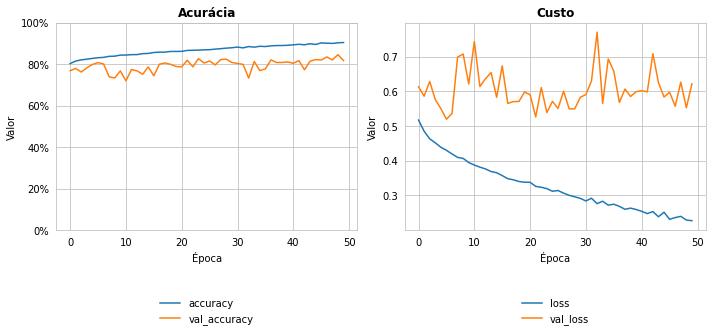

In [ ]:
fit_model(
    model_1,
    **datasets,
    weighted=True,
    **fit_params,
)


#### Modelo 2

Duração: 0:07:33
Custo (teste): 1.03
Acurácia (teste): 62.30%


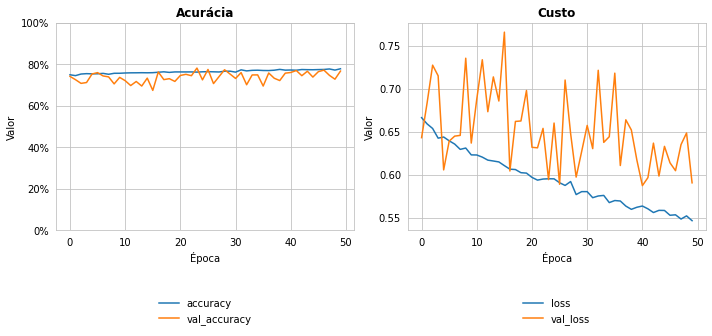

In [ ]:
fit_model(
    model_2,
    **datasets,
    weighted=True,
    **fit_params,
)


In [ ]:
fit_params['weighted'] = True

#### Discussão

##### Comparando as curvas do erro (*loss*)

Após o balanceamento das classes, podemos observar no Modelo 1 que houve um comportamento diferente para as curvas do erro. Agora, a curva do erro para o conjunto de validação apresenta-se num formato mais ruidoso. Olhando para a velocidade de convergência, percebe-se que houve uma rápida convergência, superior ao modelo desbalanceado, e isso provavelmente deve-se à predominância das classes 0 e 3 dos conjuntos de dados de treino e validação, ou seja, agora a rede tende a considerar os pesos adequados às classes menos predominantes. Este processo corrobora para uma rápida convergência das curvas, por volta de 0 épocas, sendo que a curva do erro para o conjunto de validação (val_accuracy) apresenta um comportamento de estabilização, porém, com tendência a piora, chegando a um patamar de 0.6.

O Modelo 2, por sua vez, apresenta uma convergência mais lenta, somente após cerca 20 épocas, de maneira pouco perceptível. Além disso, neste modelo, assim como no Modelo 1, há um comportamento mais estável da curva do erro para o conjunto de validação, por volta de 0.65, e podemos concluir, novamente, que o Modelo 2 teve um desempenho melhor quanto à velocidade de convergência.

##### Comparando as curvas de acurácia (*accuracy*)

No Modelo 1, as curvas de acurácia, tanto para o conjunto de teste, quanto para o conjunto de validação, apresentaram um crescimento linear ao passar das épocas e também evidenciou uma rápida convergência, por volta de 0 épocas. A curva de acurácia para o conjunto de validação (val_accuracy) tem um comportamento estável por volta de 0.8.

Já no Modelo 2 esta convergência não fica tão perceptível. A curva de acurácia para o conjunto de validação é estável por volta de 0.75. Portanto, o balanceamento das classes serviu para a rede ter uma acurácia realista ao conjunto de dados e predizer que o Modelo 2 possui um desempenho superior quanto à velocidade de convergência.

##### Acurácia dos modelos (teste e validação)

No Modelo 1, a acurácia do conjunto de teste após 50 épocas ficou por volta de 0.9, enquanto no conjunto de validação, por volta de 0.8. Já no Modelo 2, a acurácia do conjunto de teste após 50 épocas ficou por volta de 0.78, enquanto no conjunto de validação, por volta de 0.75. Novamente, a diferença é mínima e não é possível afirmar que o Modelo 1 é melhor que o Modelo 2, ainda sim, foi suficiente para que sigamos com o modelo com arquitetura menos profunda.

### Item C

> Use a rede neural para fazer predições para os dados do conjunto de teste, usando a função `predict`. Para cada uma das classes 0, 1, 2, e 3, calcule qual a precisão, cobertura e f1-score. Gere também a matriz de confusão e discuta as predições obtidas.

#### Modelo 1

Acurácia (teste): 61.20%



|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 72.80%      | 59.67%   | 65.59%     |
|  1 | 67.20%      | 70.29%   | 68.71%     |
|  2 | 28.80%      | 50.70%   | 36.73%     |
|  3 | 76.00%      | 60.51%   | 67.38%     |

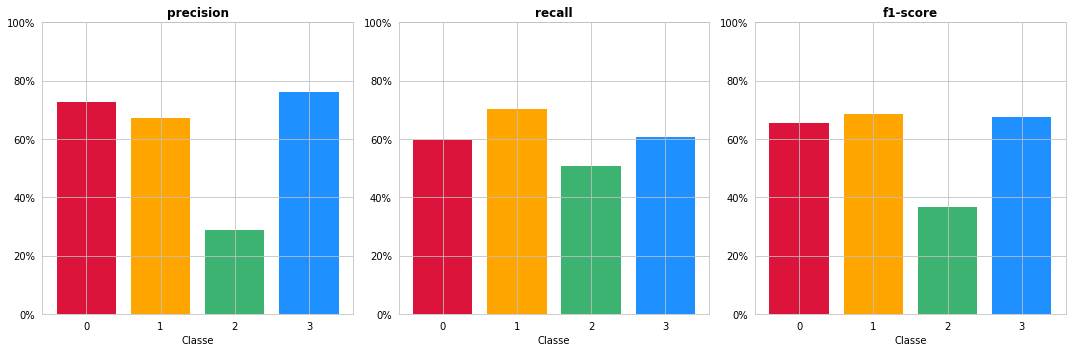

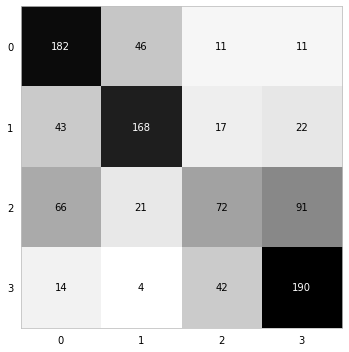

In [ ]:
display_metrics_by_class(model_1, X_test, y_test)

#### Modelo 2

Acurácia (teste): 62.30%



|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 70.40%      | 61.54%   | 65.67%     |
|  1 | 66.80%      | 76.96%   | 71.52%     |
|  2 | 38.40%      | 48.98%   | 43.05%     |
|  3 | 73.60%      | 61.13%   | 66.79%     |

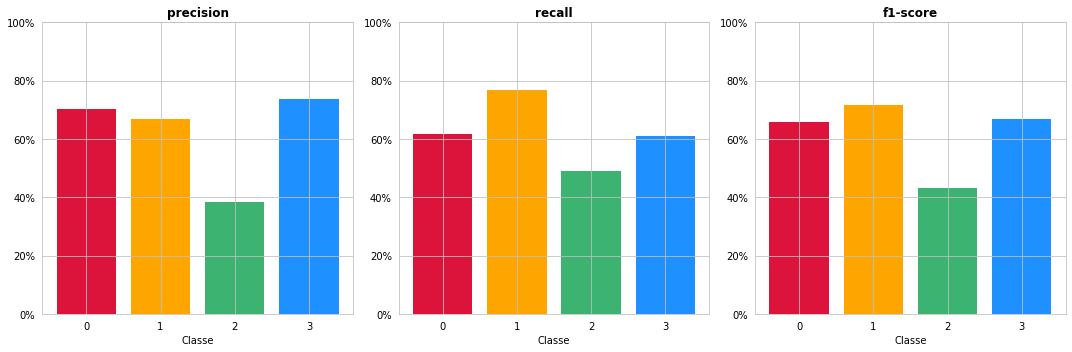

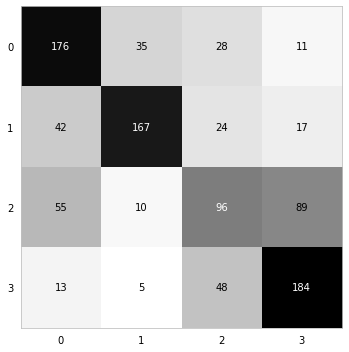

In [ ]:
display_metrics_by_class(model_2, X_test, y_test)


#### Discussão

##### Precisão
  
Para o **Modelo 1**, pode-se notar que a rede teve um desempenho bom para as classes 0 e 3, um desempenho razoável para a classe 1 e um desempenho ruim para a classe 2. Este resultado pode ser justificado pelo número de exemplos que a há para as classes, sendo que as classes 0 e 3 possuem uma quantidade de exemplos maior, no conjunto de treino, comparado com a classe 2, isso faz com que a rede seja mais assertiva na classificação de tais diagnósticos. Além disso, pela arquitetura utilizada, que é uma arquitetura de apenas 2 camadas escondidas com 200 neurônios em cada, a rede tem uma taxa de aprendizado muito alta e mal consegue absorver os padrões das imagens. Vale dizer que se fosse realizada uma predição aleatória das classes, a classe 2 teria 25% de chance de acerto e é um valor superior ao percentual de predição realizada pela rede neural.
  
Olhando agora para o **Modelo 2**, é possível notar que há um desempenho bom e semelhante nas classes 0, 1 e 3, enquanto na classe 2 houve uma melhora significativa. Isto mostra que numa arquitetura mais profunda a rede consegue ter uma taxa de aprendizado baixa e fazer predições mais assertivas das classes, principalmente para classes com poucos dados no conjunto de treinamento, como acontece neste dataset.

##### Cobertura
  
No **Modelo 1**, é possível notar que a rede conseguiu detectar melhor o diagnóstico da classe 1, que tem um *recall* de aproximadamente 74%, sendo que as demais classes ficaram com desempenho por volta de 50%. Tira-se como conclusão de que a rede neural pouco profunda consegue absorver pouco padrão nas imagens e captar uma das classe em 50% das vezes.
  
Agora, no **Modelo 2** temos que a rede está conseguindo detectar mais amostras positivas para todas as classes, com um desempenho ligeiramente inferior para a classe 1, comparado ao modelo anterior. A média de amostras positivas captadas fica em torno de 60% e mostra que uma rede treinada com uma arquitetura mais profunda consegue enxergar melhor os padrões das imagens e fazer predições melhores.


##### *F1-score*
  
A métrica f1-score, no **Modelo 1**, apresentou um resultado bom para as classes 0,         1 e 3, enquanto para a classe 2, um resultado não tão bom, porém, justificado pela         baixa precisão que, por sua vez, justifica-se pelo número de exemplos para a rede         treinar esta classe de diagnóstico.

No **Modelo 2** temos um resultado bom para as mesmas classes de diagnósticos, com uma melhora no resultado da classe 2 e isso pode ser justificado pelo desempenho da rede num todo, que consegue ser treinada com um número de passos maior.

##### Matriz de confusão

Em ambos os modelos pode-se observar que as matrizes de confusão mostram o comportamento das métricas por classe. Nas classes 0 e 3, com o maior número de exemplos, nota-se uma densidade maior de predições e acertos. Já na classe 2, os erros são grandes em comparação com o valor na diagonal, indicando que ambos os modelos se sairam mal.

## Busca de parâmetros de Redes Neurais

### Item A

> Primeiro compararemos o uso de regularização Dropout. Teste o uso de camadas de dropout após cada camada da rede neural e encontre valores onde vocês conseguem reduzir o erro no conjunto de teste. Aqui, aumente o número de épocas para 100, pois com Dropout a convergência demora mais.
>
> Coloque no relatório alguns exemplos de valores de dropout_rate que você utilizou. Selecione então o valor que gerou o melhor resultado, que é o que você passará a utilizar. Em seguida, explique porque a acurácia para os dados treinamento é menor que para os dados de validação e teste.
>
> Compare também as curvas de erro (loss) e de acurácia utilizando dropout com o caso sem dropout e explique as diferenças encontradas.

In [ ]:
fit_params['n_epochs'] = 100

Dropout: 5%
Duração: 0:12:33
Custo (teste): 1.33
Acurácia (teste): 61.90%

Dropout: 10%
Duração: 0:12:38
Custo (teste): 1.04
Acurácia (teste): 63.70%

Dropout: 15%
Duração: 0:13:22
Custo (teste): 0.92
Acurácia (teste): 65.70%

Dropout: 20%
Duração: 0:12:34
Custo (teste): 0.86
Acurácia (teste): 66.50%



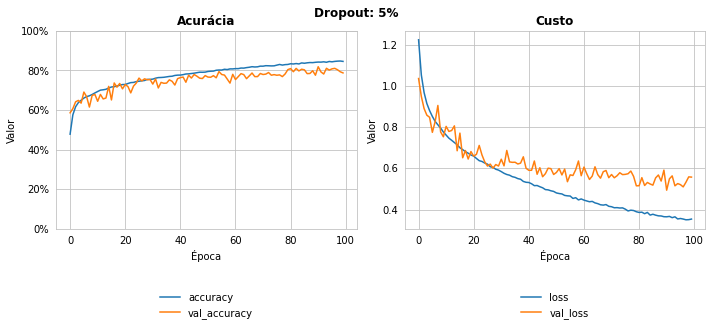

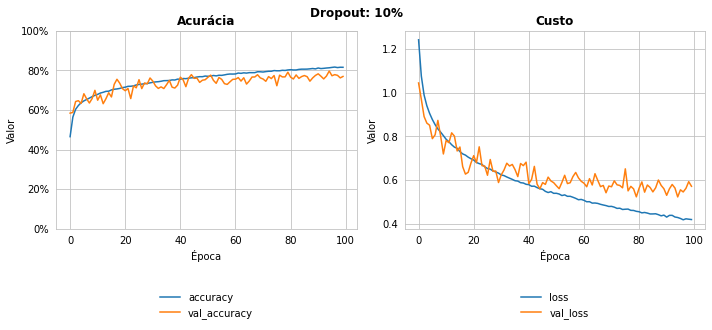

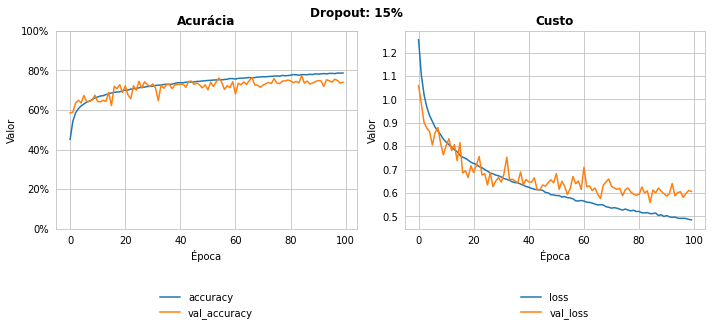

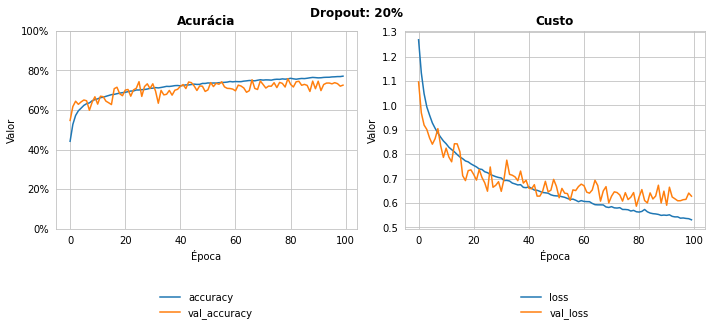

In [ ]:
for dropout_rate in np.arange(0.05, 0.25, 0.05):
    print(f'Dropout: {dropout_rate:.0%}')
    model = create_model(2, 200, dropout_rate)
    fit_model(
        model, **datasets, **fit_params
    )
    print()
    
    plt.suptitle(f'Dropout: {dropout_rate:.0%}', weight='bold')

In [ ]:
create_params["dropout_rate"] = 0.15

#### Discussão

Os valores de dropout testados foram 5, 10, 15 e 20%, na rede neural de 2 camadas com 200 neurônios.  

##### Comparações entre Valores de *Dropout*

Pode-se perceber que, na medida que a proporção de dropout aumenta, o custo no conjunto de treino demora mais a cair. Com dropout em 5%, o custo final do conjunto de treino foi aproximadamente 0.35, enquanto que com dropout em 20%, foi aproximadamente 0.55.  
Valores mais altos de dropout também fizeram com que as curvas de custo de treino e validação ficassem mais próximas, com um custo final de validação sempre próximo ao 0.6.  
A acurácia do conjunto de teste também diminuiu conforme o dropout aumentou, mas a diferença não passou de 2%, com 63.50% de acurácia com 5% de dropout, e 65.1% com 15% de dropout.  
Mesmo com a acurácia menor, valores mais altos de dropout reduziram o erro no conjunto de teste.

##### Modelo escolhido

O modelo com 15% de dropout foi escolhido por apresentar bom equilíbrio entre estabilidade nas curvas custo de treino e validação, e métricas no conjunto de teste.  
Sua curva de custo de treino acompanhou a curva de custo de validação, mostrando que não houve overfitting e que o modelo ainda pode treinar mais.  
No conjunto de teste, obteve melhor acurácia e segundo melhor custo, indicando que o modelo conseguiu generalizar relativamente bem em um conjunto de dados diferente do de treino e validação.

##### Acurácia de treino (validação e teste)

Esse comportamento só pôde ser observado em pequena escala e nas épocas inicias.  
Ele pode ser explicado pela diferença de comportamento do modelo com dropout em conjuntos de treino e validação/teste.  
Durante o treinamento, a cada exemplo, uma porção dos neurônios é aleatoriamente desativada para impedir que a rede se apoie demais em alguns neurônios e haja overfitting. Já nos conjuntos de validação e teste, todos os neurônios são utilizados sempre, o que pode levar a uma acurácia maior.  

##### Comparação custo com e sem dropout

Nas curvas de erro do modelo sem dropout treinado em 50 épocas, observa-se uma diferença maior entre os conjuntos de treino e validação, mostrando sinais de overfitting.
Já nos modelos com dropout, a diferença entre as curvas se tornou cada vez menor, evidenciando que o problema do overfitting estava sendo tratado.

### Item B

> Avalie alguns outros parâmetros de otimização vistos em aula, como otimizadores, escalonamento de taxas de aprendizado, e outros. Discuta o motivo da escolha dos parâmetros e dos valores utilizados e os resultados obtidos. Selecione qual o melhor conjunto de parâmetros encontrado. Esta é uma parte do trabalho mais livre, onde vocês tem liberdade de tomar o caminho que acharem mais apropriado.

##### Early Stopping

Duração: 0:13:22
Custo (teste): 0.92
Acurácia (teste): 66.80%
Acurácia (teste): 66.80%



|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 70.80%      | 65.80%   | 68.21%     |
|  1 | 80.80%      | 70.38%   | 75.23%     |
|  2 | 48.40%      | 57.08%   | 52.38%     |
|  3 | 67.20%      | 72.41%   | 69.71%     |

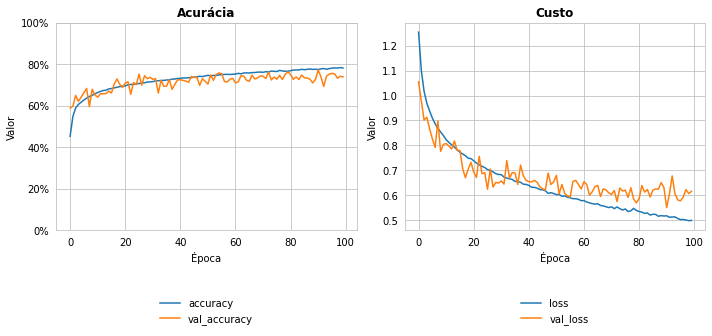

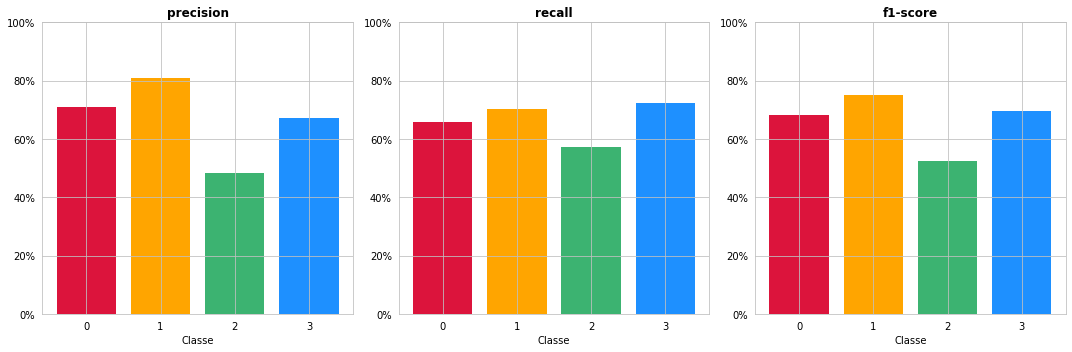

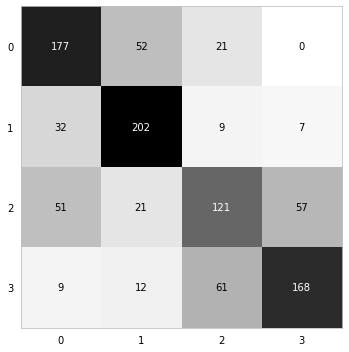

In [ ]:
model_early = create_model(2, 200, **create_params)
fit_model(model_early, **datasets, early_stopping=True, **fit_params)
display_metrics_by_class(model_early, X_test, y_test)

fit_params["early_stopping"] = True

##### Exponential Decay

Duração: 0:09:14
Custo (teste): 1.01
Acurácia (teste): 53.60%
Acurácia (teste): 53.60%



|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 71.60%      | 50.71%   | 59.37%     |
|  1 | 58.00%      | 71.78%   | 64.16%     |
|  2 | 57.20%      | 40.40%   | 47.35%     |
|  3 | 27.60%      | 75.82%   | 40.47%     |

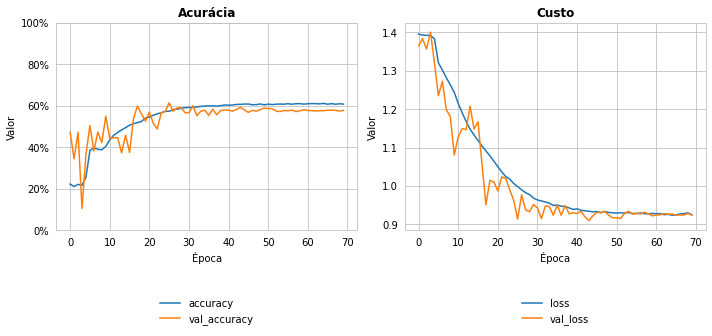

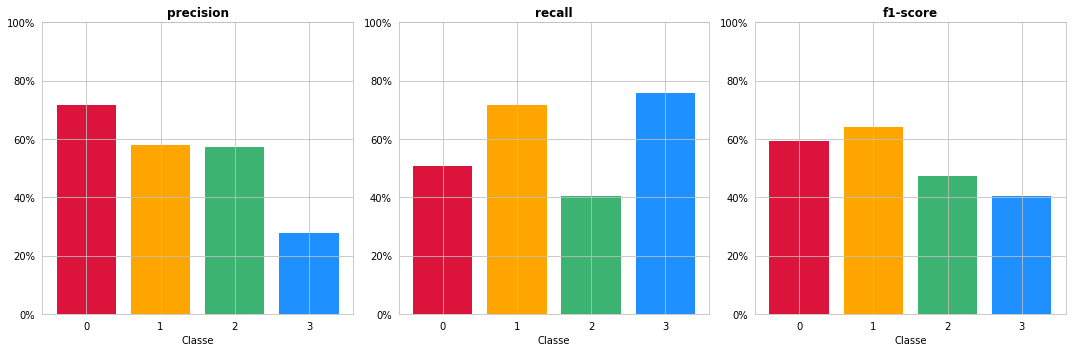

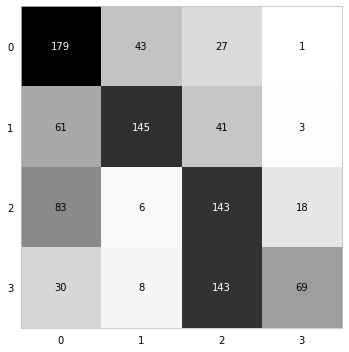

In [ ]:
model_decay = create_model(2, 200, **create_params)
fit_model(model_decay, **datasets, exponential_decay=True, **fit_params)
display_metrics_by_class(model_decay, X_test, y_test)

fit_params["exponential_decay"] = False

##### Inicialização de Kernel

Duração: 0:12:58
Custo (teste): 0.87
Acurácia (teste): 64.80%
Acurácia (teste): 64.80%



|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 81.20%      | 57.67%   | 67.44%     |
|  1 | 76.80%      | 74.13%   | 75.44%     |
|  2 | 39.60%      | 52.38%   | 45.10%     |
|  3 | 61.60%      | 77.00%   | 68.44%     |

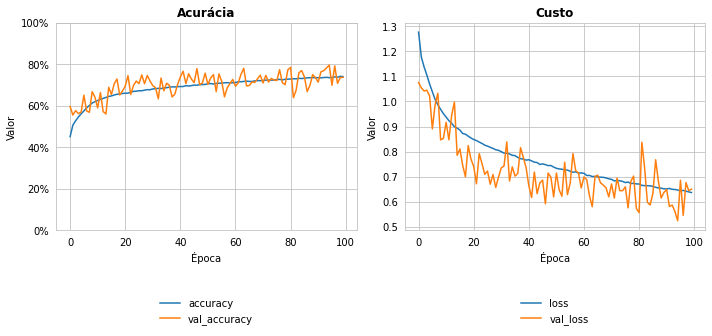

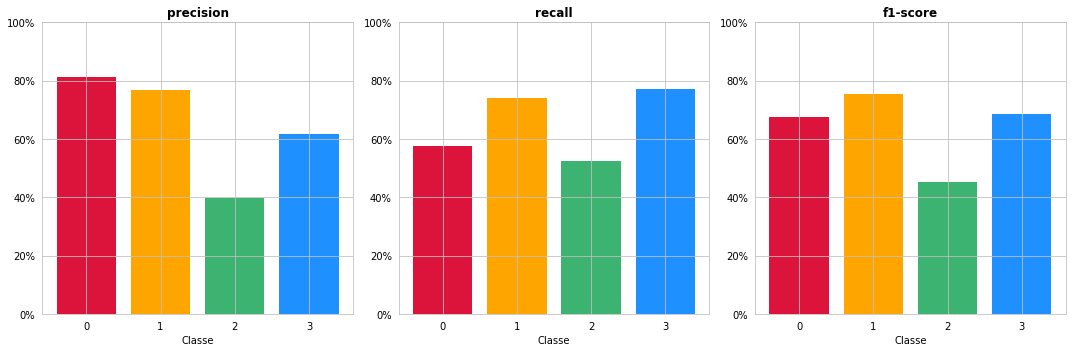

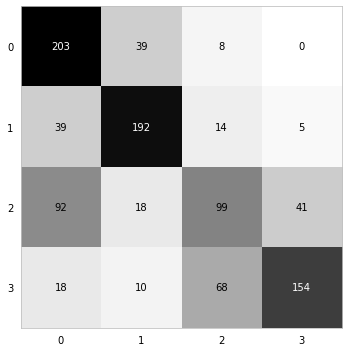

In [ ]:
model_kernel = create_model(2, 200, kernel_initializer='he_normal', **create_params)
fit_model(model_kernel, **datasets, **fit_params)
display_metrics_by_class(model_kernel, X_test, y_test)

create_params["kernel_initializer"] = 'glorot_uniform'

##### Batch Normalization

Duração: 0:13:22
Custo (teste): 0.87
Acurácia (teste): 66.70%
Acurácia (teste): 66.70%



|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 76.40%      | 62.62%   | 68.83%     |
|  1 | 76.80%      | 71.64%   | 74.13%     |
|  2 | 47.20%      | 59.60%   | 52.68%     |
|  3 | 66.40%      | 72.49%   | 69.31%     |

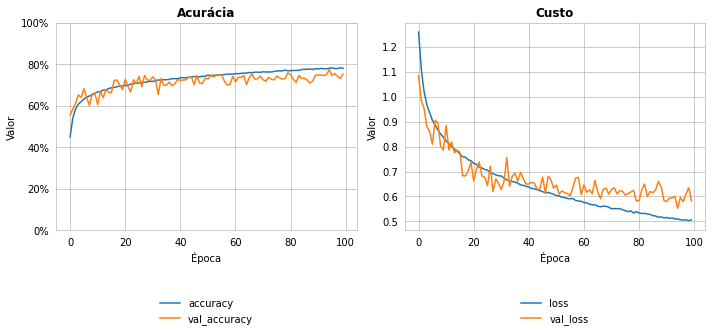

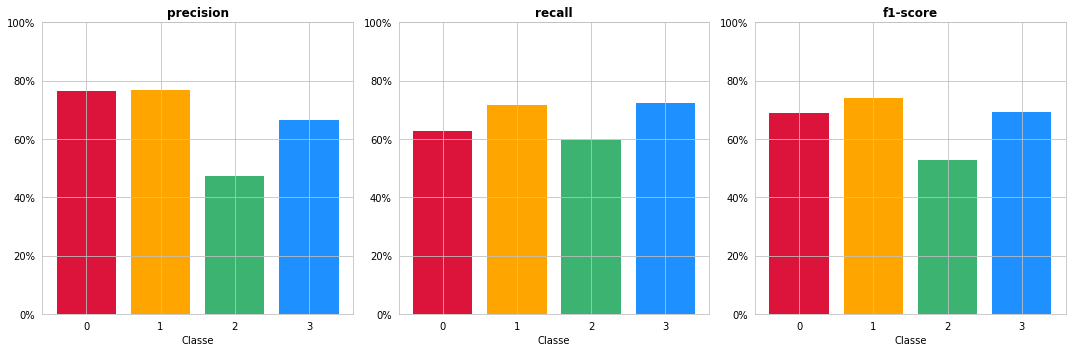

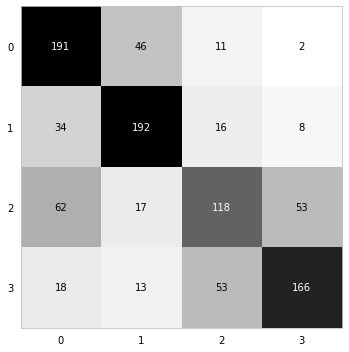

In [ ]:
model_batch = create_model(2, 200, batch_normalization=True, **create_params)
fit_model(model_batch, **datasets, **fit_params)
display_metrics_by_class(model_batch, X_test, y_test)

create_params["batch_normalization"] = False

##### ADAM

Duração: 0:13:09
Custo (teste): 0.94
Acurácia (teste): 59.50%
Acurácia (teste): 59.50%



|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 70.40%      | 58.09%   | 63.65%     |
|  1 | 66.80%      | 71.37%   | 69.01%     |
|  2 | 56.00%      | 46.05%   | 50.54%     |
|  3 | 44.80%      | 70.44%   | 54.77%     |

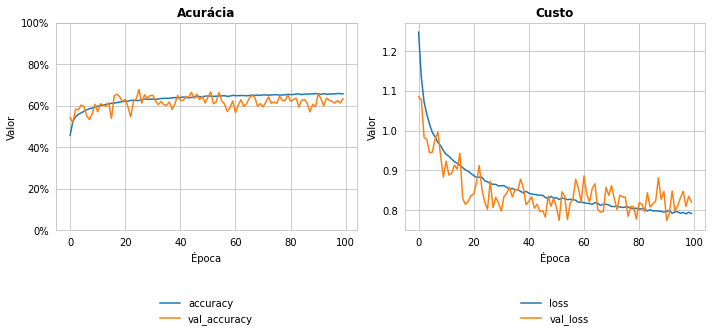

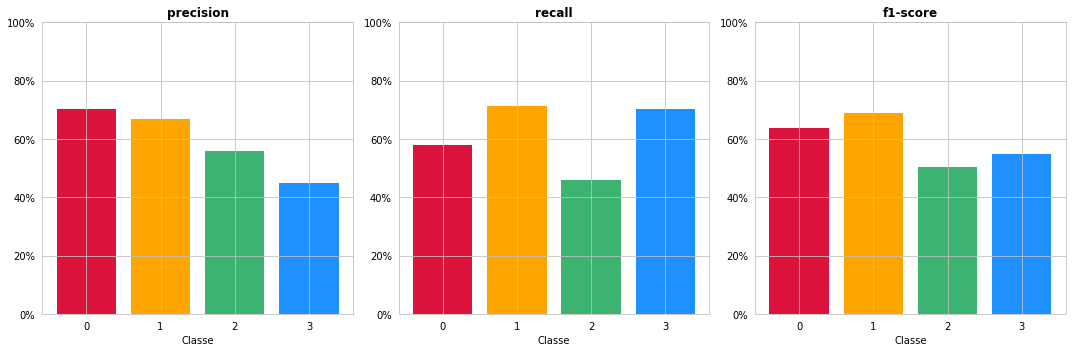

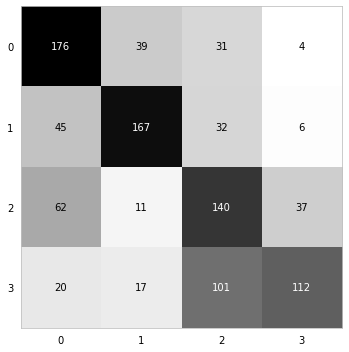

In [ ]:
model_adam = create_model(2, 200, **create_params)
fit_model(model_adam, **datasets, adam=True, **fit_params)
display_metrics_by_class(model_adam, X_test, y_test)

fit_params["adam"] = False

#### Discussão

Para avaliar e discutir os diferentes parâmetros, cada qual foi testado sequencialmente, mantendo os parâmetros fixados nas etapas anteriores quando possível. Os parâmetros iniciais foram: learning rate = 0.005, momentum = 0.9, momento e correção de nesterov, arquitetura 2X200 neurônios, dropout = 15% e treinamento em 100 épocas.

##### Early Stopping

No teste realizado o early stopping com patience = 5 não foi ativado e o modelo foi treinado nas 100 épocas, mas o parâmetro foi mantido pelo seu potencial de encurtar o tempo de processamento.

##### Exponential Decay

As métricas de acurácia e custo no conjunto de teste foram muito piores. O early stopping foi ativado e o modelo parou o treino pouco depois de 50 épocas.  Analisado as curvas, vê-se que o modelo convergiu para um mínimo local pois o custo de treino não muda mas todas as métricas são ruins. Esse parâmetro não foi mantido.

##### Inicialização de Kernel

Neste experimento a inicialização he_normal com a função de ativação elu foram utilizados, substituindo a inicialização padrão glorot_uniform e a função de ativação relu.  
Observou-se que o custo do conjunto de validação foi menor que o conjunto de teste, mas em ambos os casos a convergência demora. Os resultados de acurácia e custo no conjunto de teste foram piores, e as métricas de precisão, cobertura e f1 foram ligeiramente inferiores.
Parâmetro não foi mantido.

##### Batch Normalization

Os resultados do modelo aplicando camadas de batch normalization entre as camadas densamente conectadas foram bastante similares, tanto na velocidade de convergência quanto nas métricas em conjunto de teste.  
Notou-se uma pequena melhora na acurácia, mas que não justificou a inclusão do batch normalization no modelo.

##### ADAM

Nesse experimento, o otimizador ADAM foi utilizado.
Observou-se que o a velocidade de convergência do custo no conjunto de treino foi muito reduzida, mas o custo no conjunto de validação já mostrava sinais de estabilização próximo a 0.8, valor bem alto em comparação com configurações anteriores.  
As métricas em geral foram inferiores, e por isso esse parâmetro também não foi mantido.

##### Conclusão

O único parâmetro que foi adicionado foi o early stopping, pois os demais não mostraram melhorias substanciais para o modelo.


## Comparação com outras arquiteturas de AM

> Agora vocês irão comparar o desempenho das Redes Neurais com outros algoritmos de AM. 

### Item A

> Utilize um modelo de Boosting, como o XGBoost, com os dados do octmnist. Você deve fazer uma análise cuidadosa do uso deste método, incluindo a busca de parâmetros com validação cruzada. Coloque no relatório todos os parâmetros que você testou e os resultados obtidos. 
>
> Escolha o melhor modelo encontrado e compare o desempenho com o modelo de redes neurais. A partir das diferenças de acurácia e tempo de execução, qual sua conclusão sobre o uso de redes neurais e algoritmos de árvores neste problema.

#### Gradient Boosting (sem busca em grade)

In [ ]:
clf = XGBClassifier(n_estimators=100, random_state=RANDOM_STATE)

start_time = time()
results = cross_validate(clf, X_train_flat, y_train_flat, cv=SKF, scoring=('accuracy'))
end_time = time()

duration = end_time - start_time
timestamp = timedelta(seconds=np.floor(duration))

score = np.mean(results['test_score'])

print(
    f'Duração da validação cruzada: {timestamp}'
    f'\nAcurácia (validação): {score:.2%}'
)

Duração da validação cruzada: 0:43:14
Acurácia (validação): 70.88%


Acurácia (teste): 43.90%



|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 81.20%      | 50.75%   | 62.46%     |
|  1 | 2.80%       | 100.00%  | 5.45%      |
|  2 | 0.00%       | 0.00%    | 0.00%      |
|  3 | 91.60%      | 38.62%   | 54.33%     |

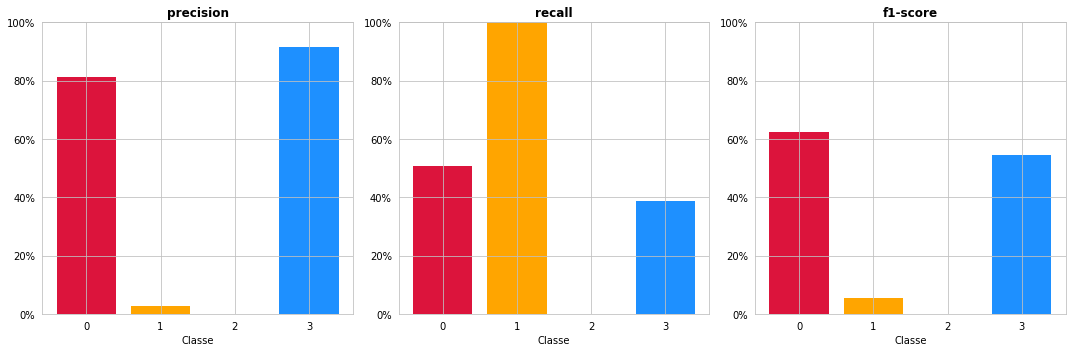

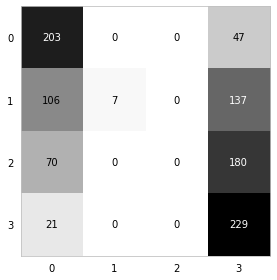

In [ ]:
clf.fit(X_train_flat, y_train_flat)
display_metrics_by_class(clf, X_test_flat, y_test_flat)

#### Gradient Boosting (com busca em grade)

A busca em grade para esse caso é um processo tão custoso que não é possível executar em ambiente de nuvem ou em ambiente local sem exceder os limites de *hardware* disponíveis para o grupo, por isso, após muitas tentativas, foram feitos alguns testes com combinações diferentes de parâmetros para avaliar a capacidade do Gradient Boosting nesse contexto.

In [ ]:
param_grid = {
    'max_depth': range(2,6),
    'gamma': np.arange(0.5, 2.1, 0.5),
    'eta': np.arange(0.1, 0.31, 0.1)
}

xgb = XGBClassifier(n_estimators=100, random_state=RANDOM_STATE)
grid = RandomizedSearchCV(xgb, param_grid, scoring=('accuracy'), cv=SKF, return_train_score=True, verbose=0)

start_time = time()
grid.fit(X_train_flat, y_train_flat)
end_time = time()

duration = end_time - start_time
timestamp = timedelta(seconds=np.floor(duration))

score = np.mean(results['test_score'])

print(
    f'\nDuração do treino: {duration:.2f}'
    f'\nAcurácia (validação): {grid.best_score_:.2%}'
)

display_metrics_by_class(grid.best_estimator_, X_test_flat, y_test_flat)

##### Gradient Boosting ($\gamma = 0.1$, $\eta = 0.2$, `max_depth` = 5)

Duração da validação cruzada: 0:28:45
Acurácia (validação): 76.79%
Acurácia (teste): 50.30%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 89.20%      | 52.35%   | 65.98%     |
|  1 | 19.60%      | 96.08%   | 32.56%     |
|  2 | 0.00%       | 0.00%    | 0.00%      |
|  3 | 92.40%      | 44.17%   | 59.77%     |

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  func(*args, **kwargs)


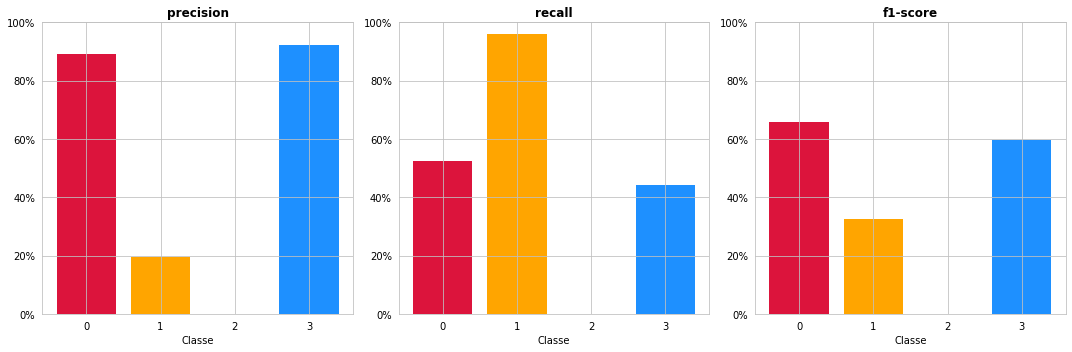

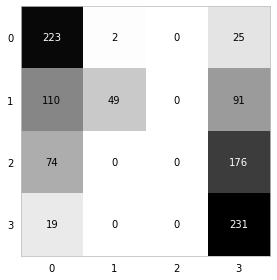

In [ ]:
clf = XGBClassifier(n_estimators=100, random_state=RANDOM_STATE, gamma = 0.1, eta=0.2, max_depth = 5)

start_time = time()
results = cross_validate(clf, X_train_flat, y_train_flat, cv=SKF, scoring=('accuracy'))
end_time = time()

duration = end_time - start_time
timestamp = timedelta(seconds=np.floor(duration))

score = np.mean(results['test_score'])

print(
    f'Duração da validação cruzada: {timestamp}'
    f'\nAcurácia (validação): {score:.2%}'
)

clf.fit(X_train_flat, y_train_flat)
display_metrics_by_class(clf, X_test_flat, y_test_flat)

##### Gradient Boosting ($\gamma = 1.1$, $\eta = 0.2$, `max_depth` = 5)

Duração da validação cruzada: 0:35:16
Acurácia (validação): 76.87%
Acurácia (teste): 50.10%



|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 88.80%      | 51.87%   | 65.49%     |
|  1 | 20.40%      | 92.73%   | 33.44%     |
|  2 | 0.00%       | 0.00%    | 0.00%      |
|  3 | 91.20%      | 44.10%   | 59.45%     |

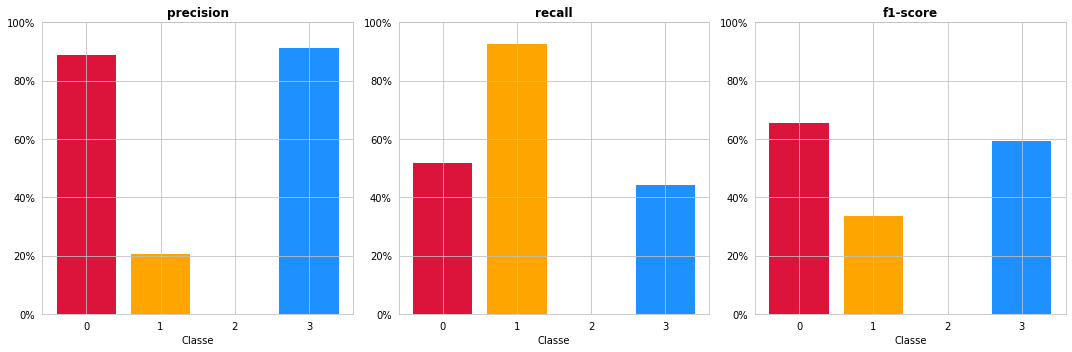

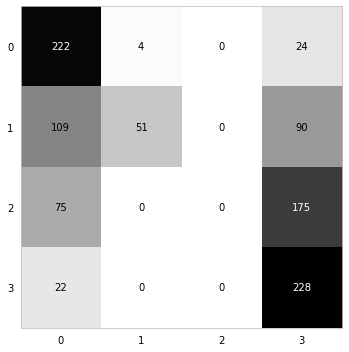

In [ ]:
clf = XGBClassifier(n_estimators=100, random_state=RANDOM_STATE, gamma = 1.1, eta=0.2, max_depth = 5)

start_time = time()
results = cross_validate(clf, X_train_flat, y_train_flat, cv=SKF, scoring=('accuracy'))
end_time = time()

duration = end_time - start_time
timestamp = timedelta(seconds=np.floor(duration))

score = np.mean(results['test_score'])

print(
    f'Duração da validação cruzada: {timestamp}'
    f'\nAcurácia (validação): {score:.2%}'
)

clf.fit(X_train_flat, y_train_flat)
display_metrics_by_class(clf, X_test_flat, y_test_flat)

##### Gradient Boosting ($\gamma = 1.1$, $\eta = 0.2$, `max_depth` = 7)

Duração da validação cruzada: 0:41:33
Acurácia (validação): 80.49%
Acurácia (teste): 54.00%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 90.40%      | 51.95%   | 65.99%     |
|  1 | 34.00%      | 93.41%   | 49.85%     |
|  2 | 0.00%       | 0.00%    | 0.00%      |
|  3 | 91.60%      | 48.31%   | 63.26%     |

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  func(*args, **kwargs)


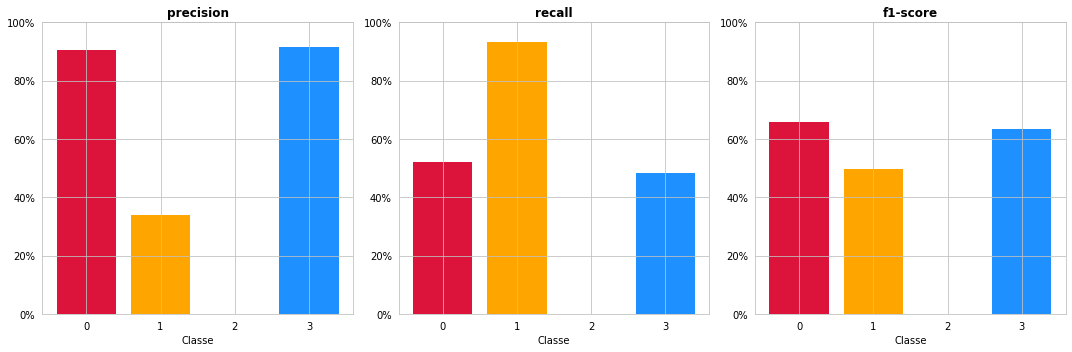

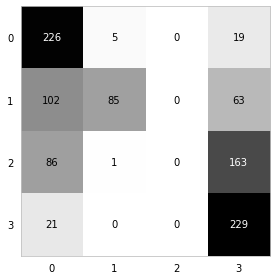

In [ ]:
clf = XGBClassifier(n_estimators=100, random_state=RANDOM_STATE, gamma = 1.1, eta=0.2, max_depth = 7)

start_time = time()
results = cross_validate(clf, X_train_flat, y_train_flat, cv=SKF, scoring=('accuracy'))
end_time = time()

duration = end_time - start_time
timestamp = timedelta(seconds=np.floor(duration))

score = np.mean(results['test_score'])

print(
    f'Duração da validação cruzada: {timestamp}'
    f'\nAcurácia (validação): {score:.2%}'
)

clf.fit(X_train_flat, y_train_flat)
display_metrics_by_class(clf, X_test_flat, y_test_flat)

##### Gradient Boosting ($\gamma = 1.1$, $\eta = 0.2$, `max_depth` = 7)

Duração da validação cruzada: 0:41:30
Acurácia (validação): 80.49%
Acurácia (teste): 54.00%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|    | precision   | recall   | f1-score   |
|---:|:------------|:---------|:-----------|
|  0 | 90.40%      | 51.95%   | 65.99%     |
|  1 | 34.00%      | 93.41%   | 49.85%     |
|  2 | 0.00%       | 0.00%    | 0.00%      |
|  3 | 91.60%      | 48.31%   | 63.26%     |

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  func(*args, **kwargs)


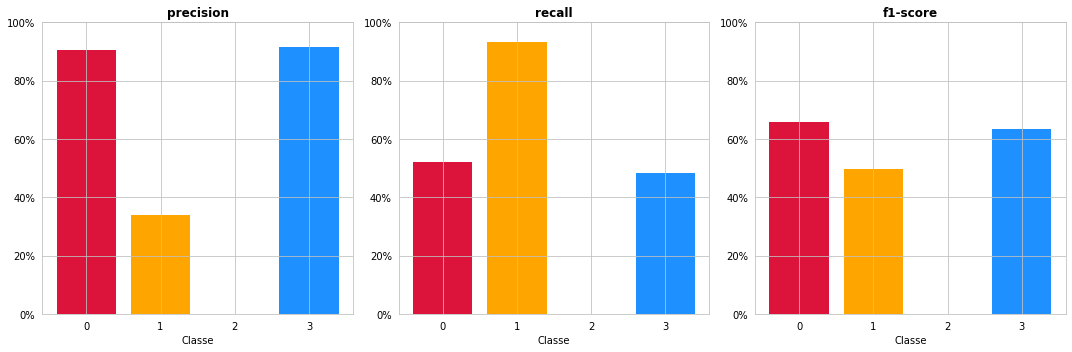

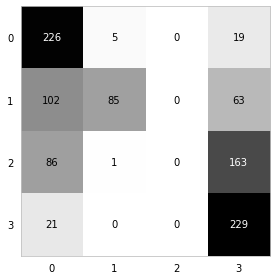

In [ ]:
clf = XGBClassifier(n_estimators=100, random_state=RANDOM_STATE, gamma = 1.1, eta=0.2, max_depth = 7)

start_time = time()
results = cross_validate(clf, X_train_flat, y_train_flat, cv=SKF, scoring=('accuracy'))
end_time = time()

duration = end_time - start_time
timestamp = timedelta(seconds=np.floor(duration))

score = np.mean(results['test_score'])

print(
    f'Duração da validação cruzada: {timestamp}'
    f'\nAcurácia (validação): {score:.2%}'
)

clf.fit(X_train_flat, y_train_flat)
display_metrics_by_class(clf, X_test_flat, y_test_flat)

#### Discussão

O modelo de boosting escolhido para a comparação foi o XGBoost, e a escolha de parâmetros foi feita iterativamente, e utilizando validação cruzada com 3 folds. Inicialmente foram feitas tentativas de utilizar busca em grade para a busca automatizada de parâmetros, mas devido a limitações de recursos da plataforma, essa estratégia não foi possível.

Os parâmetros testados foram gamma, learning_rate e max_depth.   

O melhor modelo encontrado, com os parâmetros gamma = 1.1 , learning_rate = 0.2, max_depth = 7, obteve uma acurácia no conjunto de teste de apenas 54%.
Esse modelo performou significativamente pior que o modelo de redes neurais em quase todas as métricas, exceto precisão das classes 0 e 3. Pode-se ver na matriz de confusão como o XGBoost classificou quase todos os exemplos nas classes 0 e 3, ignorando as demais. Esse é um sinal de overfitting do modelo XGBoost.  

O tempo de execução do XGBoost utilizando validação cruzada com 3 folds (portanto, 3 modelos) ficou entre 30 e 40 minutos, superando o tempo de treino dos modelos de redes neurais, que ficou em 15 minutos para 100 épocas.
Conclui-se que o tempo de treinamento de um único modelo XGboost é comparável aos modelos de redes neurais aqui testados.

